# 数据可视化第一次作业
#### 李云帆 16302010002

# 1.Design a similarity metric or distance metric for student information
### data formatted as follows:

#### Data: <V1, V2, V3, V4>, where

#### V1:  height of the student (unit: m)

#### V2:  Weight of the student (unit: kg)

#### V3:  Place of Birth (province/city)

#### V4:  Grade (grade 1-5)

 $$ d_{ij}=\sqrt{{V1_{(i)}-V1_{(j)}}^2+{V2_{(i)}-V2_{(j)}}^2+{V3_{(i)}-V3_{(j)}}^2+\partial({V4_{(i)}},{V4_{(j)}}}) $$
 其中 
 $$
 \partial({V4_{(i)}},{V4_{(j)}}=\begin{cases}
 1,&{{V4_{(i)}}={V4_{(j)}}} \\ 0,&{{V4_{(i)}}\ne{V4_{(j)}}}
 \end{cases} 
 $$

#### 解释上述设计：我们希望对每两位同学计算出一个相似度距离，我的想法是用欧式距离来定义相似度距离，对他们彼此间的V1，V2，V3，V4分别计算差值，再计算平方和的开平方。对于V4，由于它是一个因子向量，无法进行量化计算距离，于是我觉得可以将这个项定义为两位同学是否来自同一个省份，是则为1，否则为0。（实际中可能不合适，但我不能想出其他的办法，此外，这个项需要一个系数，不过我没有包含在其中）

# 2.色彩转换算法：CMYK和RGB互转

In [2]:
#  R,G,B 的取值是 0-255。C,M,Y,K 的取值是 0-100。
# RGB 和 CMYK 并不能一一对应，RGB色彩模式的图像转换成CMYK色彩模式的图像会产生分色。
# 这里面存在的问题是黑色部分的替换值的取值问题。但 RGB 所可以全部对应 CMY 格式

def CMYK2RGB(C, M, Y, K):
    R = 255 * (100 - C) * (100 - K) / 10000;
    G = 255 * (100 - M) * (100 - K) / 10000;
    B = 255 * (100 - Y) * (100 - K) / 10000;
    return R, G, B

# 当从RGB 得到相应的CMY 之后，我们若要得到 CMYK 值，就必须定义一个“黑色替换值” K，也就是说提取各色通道中的若干成分来形成黑色通道。
def RGB2CMYK(R, G, B):
    K = int(min(min(255 - R, 255 - G), 255 - B) / 2.55)
    R = round(R / 2.55)
    Div = 100 - K
    if Div == 0:
        Div = 1
    G = round(G / 2.55)
    C = int(((100 - R - K) / Div) *100)
    M = int(((100 - G - K) / Div) * 100)
    B = round(B / 2.55)
    Y = int(((100 - B - K) / Div) * 100)
    return C, M, Y, K


R, G, B = 230, 99, 88
C, M, Y, K = RGB2CMYK(R, G, B)
print(C, M, Y, K)
print("https://www.fontke.com/tool/rgb/230,99,88")
print("https://www.fontke.com/tool/cmyk/" + str(C) + "," + str(M) + "," + str(Y) + "," + str(K))

1 57 61 9
https://www.fontke.com/tool/rgb/230,99,88
https://www.fontke.com/tool/cmyk/1,57,61,9


# 3.1视觉感知的相对判断原则在网络上常被用于制作一些包含错觉的图片，请查找两幅这样的图片，并说明所理解的其背后用到的视觉感知的原理。

count_black_dots.jpg
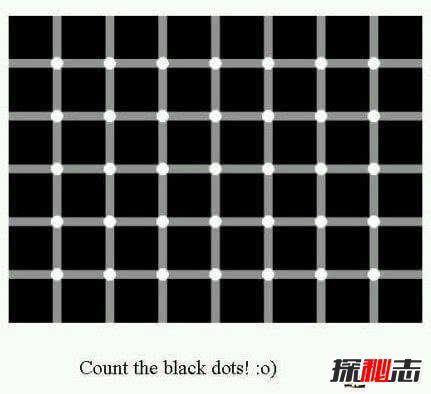

water_flow.jpg
![jupyter](./water_flow.jpg)

ball_in_middle.jpg
![jupyter](./ball_in_middle.jpg)

spinning_ring.jpg
![jupyter](./spinning_ring.jpg)

#### 为什么我们看来上述的这些图片会产生不一样的错觉呢,其实因为这些图片利用了人眼错觉制成的视觉后像，比如，盯着灯泡看三十秒以上不要移动你的目光，然后将目光转移到白色的区域，看到灯泡发亮了吗，这就是视觉后像。因为光刺激视觉器官时，细胞的兴奋会随着刺激的终止而消失，但是却保留了很短的一段时间，被称为后像，视觉后象分正后象和负后象两种。正后象是一种与原来刺激性质相同的感觉印象。负后象则是一种与原来刺激相反的感觉印象。如光亮部分变为黑暗部分，黑暗部分变为光亮部分。正负后象的发生是由于神经兴奋所留下的痕迹的作用。再比如，我们看电影时，觉得电影其实是连续播放的，其实电影是拍摄成一段一段后再合成到一起的，这是正后像的例子之一。像这样的错觉图片还有很多，它们都是利用了人眼的这种错觉产生的在最后向大家列出一些这样的图片。
#### 坦诚：copy了网上的资料，因为本身对这个领域不是很了解，只能边做边学习了。

# 4.利用快排算法找到n-th biggest number

In [3]:
# 简单快排实现，快排的原理是前锋作为分水岭，左右分治递归排序
def q_sort(l):
    def quicksort(l,left,right):
        if right>left:
            #get first number p from left end
            pivot,j,tmp=left,left+1,l[left]
            #move elements<p to the left side
            #move elements>=p to the right side
            while j<=right:
                if l[j]<tmp:
                    pivot=pivot+1
                    l[pivot],l[j]=l[j],l[pivot]
                j=j+1
            l[left],l[pivot]=l[pivot],l[left]
            #recursively quicksort left and right part
            quicksort(l,left,pivot-1)
            quicksort(l,pivot+1,right)
    quicksort(l,0,len(l)-1)

In [5]:
import random
r = random.SystemRandom() 
x = list(range(1,100))

r.shuffle(x)
print (x)
q_sort(x)
print (x)
# Finding k-th biggest number, x[k-1]. 
# Exp. suppose k = 27
x[27-1]

[28, 3, 67, 41, 26, 32, 37, 78, 53, 4, 82, 87, 75, 46, 59, 65, 92, 10, 63, 57, 80, 35, 11, 13, 14, 68, 91, 97, 71, 8, 76, 54, 95, 66, 1, 47, 70, 31, 15, 81, 9, 94, 52, 49, 30, 77, 83, 69, 42, 6, 34, 2, 74, 89, 48, 16, 24, 40, 17, 12, 86, 25, 22, 44, 88, 38, 90, 7, 56, 43, 96, 20, 55, 23, 58, 29, 73, 79, 60, 18, 62, 27, 39, 64, 33, 50, 98, 45, 72, 99, 61, 51, 93, 36, 84, 21, 5, 19, 85]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


27